In [3]:
#Imports
import json
import numpy as np
import pandas as pd
import csv
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# path = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Luis/analisis/'
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/'
experiments = os.listdir(path + 'jsons/')
min_exp = pd.DataFrame()
for i in range(0,len (experiments)):
    experiment = experiments[i]
    with open(path + 'jsons/' + experiment) as f:
        min_file = json.load(f)['image']['min_peaks_intensities']
        min_exp[i] = experiment,np.array(min_file).std()
min_exp = pd.DataFrame (min_exp.T)
min_exp.columns = ['file','std_min']

In [5]:
# Filtrado por tratamiento y frecuencia

def tau_filter(tratamiento,frecuencia,df):
    tabulado_filter = tabulado[(tabulado['tratamiento']==tratamiento) & (tabulado['frecuencia']== frecuencia)].reset_index(drop=True)
    tau = pd.DataFrame(columns = ['file','std_min'])
    for j in range(0,len (tabulado_filter)):
        celula = tabulado_filter['célula'][j]
        foto = tabulado_filter['foto'][j][:-4]
        for i in range(0,len (df)):
            if (celula in df['file'][i]) & (foto in df['file'][i]):
                tau.loc[j] = df.loc[i]
    return tau

In [7]:
tabulado = pd.read_csv(path + 'tabulado')
del tabulado['Unnamed: 0']

In [8]:
tabulado_control5 = tau_filter('C', 5, min_exp)
tabulado_vk5 = tau_filter('VK', 5, min_exp)
tabulado_dan5 = tau_filter('DAN', 5, min_exp)

In [9]:
tabulado_control5.drop(3, inplace=True)

<AxesSubplot:>

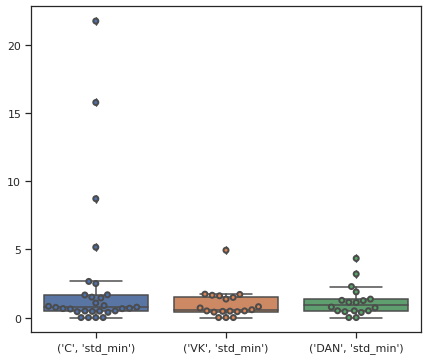

In [10]:
df = pd.concat ([tabulado_control5,tabulado_vk5,tabulado_dan5], axis=1, sort=False, keys=['C', 'VK','DAN'])
df
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


sns.boxplot(data=df)

sns.swarmplot(data=df, linewidth=2)

In [18]:
print(scipy.stats.ttest_ind(tabulado_control5['std_min'],tabulado_dan5['std_min']))
print(scipy.stats.ttest_ind(tabulado_control5['std_min'],tabulado_vk5['std_min']))
print(scipy.stats.ttest_ind(tabulado_vk5['std_min'],tabulado_dan5['std_min']))
# print(scipy.stats.shapiro(tabulado_dan5['std_min']))

Ttest_indResult(statistic=1.1020852569769626, pvalue=0.27628425065165757)
Ttest_indResult(statistic=1.2932379942017034, pvalue=0.2023858532310172)
Ttest_indResult(statistic=-0.5007131003403411, pvalue=0.6197074014789657)


In [ ]:
DI_control = pd.read_csv(path + 'DI_control.csv')

In [ ]:
DI_control

In [ ]:
min5 = []
for i in range(0,len(DI_control['file'])):
    cel = DI_control['file'][i]
    filtro_wc5 = tabulado_control5[(tabulado_control5['file'].str.contains(cel) == True)]
    min5.append (filtro_wc5['std_min'].values)
DI_control['min5'] = min5

In [ ]:
# DI_control.drop(4, inplace=True)
b = [j for i in DI_control['min5'].tolist() for j in i]
a = DI_control['DISCORDANCE 5 Hz']

In [ ]:
from scipy.stats.stats import pearsonr 
print (pearsonr(DI_control['DISCORDANCE 5 Hz'],b))

In [ ]:
plt.scatter(a,b)

In [13]:
tabulado_control5

,file,std_min
0,010719ctrol1_analysis_result_ctrol1a0.json,15.797327
1,010719ctrol8_analysis_result_ctrol8a0.json,2.500000
2,010819c3_analysis_result_c3b001.json,5.165995
4,010819c1_analysis_result_c1b000.json,0.829156
5,010819c2_analysis_result_c2b000.json,21.777052
6,031019c4_analysis_result_c4e000.json,1.658312
7,031019c1_analysis_result_c1e000.json,2.653300
8,050320c1_analysis_result_c1d000.json,0.628539
9,050320c7_analysis_result_7d001.json,0.000000
10,050320c2_analysis_result_2d000.json,0.385695
